## Introduction

We use the methodology of data science to answer the question: does it rain more in Seattle or St. Louis?


We will be using the clean data set I created in [this file](https://github.com/cmdenault/SeattleWeather/blob/main/data_preparation.ipynb), which contains daily precipitation values for St Louis and Seattle from 2018-2022. 

This was derived from this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather), using precipitation data originally from the NOAA National Centers for Environmental Information's [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND).

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [3]:
clean_df = pd.read_csv('https://raw.githubusercontent.com/cmdenault/SeattleWeather/main/clean_seattle_stl_weather.csv')

##### $\rightarrow$ Review the contents of the data set.

In [4]:
clean_df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.0,1,1
1,2018-01-02,STL,0.0,2,1
2,2018-01-03,STL,0.0,3,1
3,2018-01-04,STL,0.0,4,1
4,2018-01-05,STL,0.0,5,1


## State your questions

The overall problem is to compare how much it rains in Seattle and St. Louis. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ Questions about the data that will help solve the problem.

  Where does it rain more by volume?

  Where has more rainy days than non rainy days?

  What city has more heavy rain days?

## Analysis

I will subset data frames and create graphs related to the sub questions.

### Where does it rain more by volume?

Let's look at overall precipitation descriptions by city.

In [29]:
clean_df.groupby('city').describe()

precipitation                                                  \
             count      mean       std  min  25%   50%   75%   max   
city                                                                 
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60   
STL         1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64   

     day_of_year              ...                 month                      \
           count        mean  ...    75%    max   count      mean       std   
city                          ...                                             
SEA       1826.0  183.100219  ...  274.0  366.0  1826.0  6.523549  3.449478   
STL       1826.0  183.100219  ...  274.0  366.0  1826.0  6.523549  3.449478   

                                 
      min  25%  50%   75%   max  
city                             
SEA   1.0  4.0  7.0  10.0  12.0  
STL   1.0  4.0  7.0  10.0  12.0  

[2 rows x 24 columns]

Seattle has a lower max daily rainfall, and a lower mean amount of daily rainfall. However, Seattle also has a third quartile value more than double St. Louis. 

It looks like Seattle likely has more days with rain, but when it rains, it rains in lower amounts. St Louis has more days with none or lower amounts of rain, but likely has some days with very high rain that raise up the mean.

Let's create a data frame with the mean monthly rainfall amount from 2018-2022 for each city.

In [6]:
# st louis
stl_mean_monthly_precipitation = clean_df.loc[clean_df['city']=='STL', ['precipitation', 'month']].groupby('month').mean()

In [7]:
stl_mean_monthly_precipitation['city']='STL'
stl_mean_monthly_precipitation.head()

,precipitation,city
month,,
1,0.102065,STL
2,0.118298,STL
3,0.171355,STL
4,0.143733,STL
5,0.174839,STL


In [8]:
# seattle
sea_mean_monthly_precipitation = clean_df.loc[clean_df['city']=='SEA', ['precipitation', 'month']].groupby('month').mean()

In [9]:
sea_mean_monthly_precipitation['city']='SEA'
sea_mean_monthly_precipitation.head()

,precipitation,city
month,,
1,0.230742,SEA
2,0.176472,SEA
3,0.089075,SEA
4,0.100483,SEA
5,0.069161,SEA


In [49]:
mean_prcp = pd.concat([sea_mean_monthly_precipitation, stl_mean_monthly_precipitation]).reset_index()
mean_prcp.head(15)

,month,precipitation,city
0,1,0.230742,SEA
1,2,0.176472,SEA
2,3,0.089075,SEA
3,4,0.100483,SEA
4,5,0.069161,SEA
5,6,0.063167,SEA
6,7,0.013984,SEA
7,8,0.019995,SEA
8,9,0.055622,SEA
9,10,0.118452,SEA


I then create a bar graph detailing average yearly rainfall for both cities.

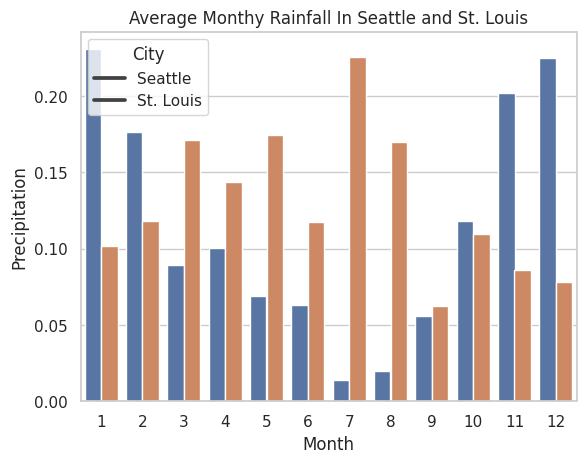

In [34]:
monthy_avgs = sns.barplot(data=mean_prcp, x='month', y='precipitation', hue='city')
monthy_avgs.set(title='Average Monthy Rainfall In Seattle and St. Louis',
                xlabel='Month',
                ylabel='Precipitation')

monthy_avgs.legend(labels=['Seattle', 'St. Louis'],
                   title= 'City')

Lets look at the total amount of precipitation over 2018-2022

In [58]:
# calculate sum of precipitation for each city
tot_sums = clean_df.groupby('city').sum('precipitation').reset_index()
tot_sums

,city,precipitation,day_of_year,month
0,SEA,206.831667,334341,11912
1,STL,238.010000,334341,11912


[Text(0.5, 1.0, 'Total Rainfall 2018-2022'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Precipitation (inches)')]

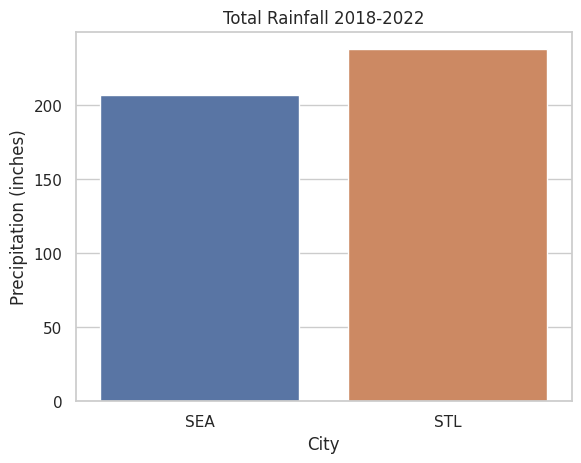

In [60]:
see_totals = sns.barplot(data=tot_sums, x='city', y='precipitation')
see_totals.set(title='Total Rainfall 2018-2022',
                xlabel='City',
                ylabel='Precipitation (inches)')

### Where has more rainy days than non rainy days?

Using data from all 4 years, I make a data frame counting the number of days from each city where no rainfall was recorded. 

In [12]:
# days with no rain
no_rain = clean_df[clean_df['precipitation'] <= 0].groupby('city').count().reset_index()

Then, generate a bar graph comparing the amount between the 2 cities.

[Text(0.5, 1.0, 'Number of Days with No Rain (2018-2022)'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Number of Days'),
 [Text(0, 0, 'Seattle'), Text(1, 0, 'St. Louis')]]

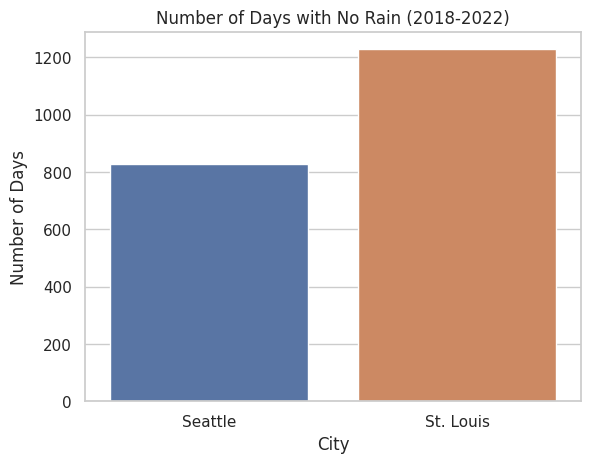

In [13]:
all_no_rain = sns.barplot(data=no_rain, x='city', y='precipitation')
all_no_rain.set(title='Number of Days with No Rain (2018-2022)',
                xlabel='City',
                ylabel='Number of Days',
                xticklabels=['Seattle', 'St. Louis'])

I also want to look at the number of days with no rainfall using the mean daily rainfall using data from 2018-2022. 

I first make a data frame with the mean of the each day in a year, using the data from clean_df 2018-2022 data. 

In [14]:
sea_mean_daily_precipitation = clean_df.loc[clean_df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [15]:
stl_mean_daily_precipitation = clean_df.loc[clean_df['city']=='STL', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [16]:
sea_mean_daily_precipitation['city']='SEA'

In [17]:
stl_mean_daily_precipitation['city']='STL'

In [18]:
mean_prcp_daily = pd.concat([sea_mean_daily_precipitation, stl_mean_daily_precipitation]).reset_index()
mean_prcp_daily.head()

,day_of_year,precipitation,city
0,1,0.052000,SEA
1,2,0.150000,SEA
2,3,0.836000,SEA
3,4,0.370000,SEA
4,5,0.246667,SEA


In [19]:
no_rain_mean = mean_prcp_daily[mean_prcp_daily['precipitation'] <= 0].groupby('city').count().reset_index()
no_rain_mean.head()

,city,day_of_year,precipitation
0,SEA,36,36
1,STL,57,57


[Text(0.5, 1.0, 'Number of Days with No Rain (In An Average Year)'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Number of Days'),
 [Text(0, 0, 'Seattle'), Text(1, 0, 'St. Louis')]]

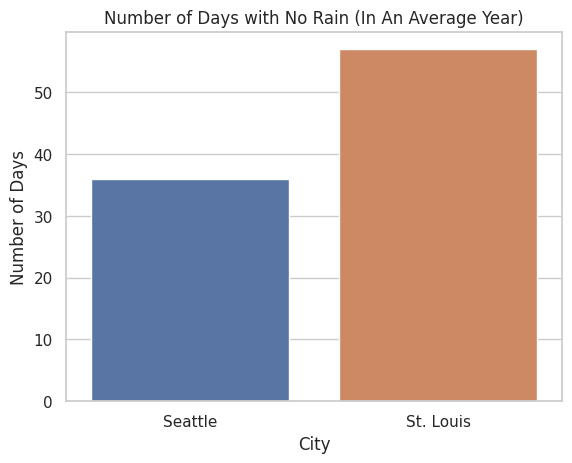

In [20]:
mean_no_rain = sns.barplot(data=no_rain_mean, x='city', y='precipitation')
mean_no_rain.set(title='Number of Days with No Rain (In An Average Year)',
                xlabel='City',
                ylabel='Number of Days',
                xticklabels=['Seattle', 'St. Louis'])

### What city has more heavy rain days?

Using the average daily rainfall data, I compare the number of days in a year that falls in a number of intervals regarding amount of rainfall. 

Then, use the resulting data frame to make a histogram.

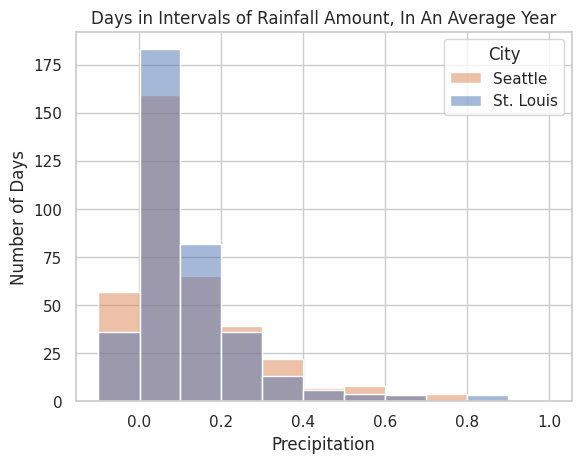

In [21]:
#histogram
big_hist = sns.histplot(data=mean_prcp_daily, 
             x='precipitation', 
             hue='city', 
             bins=[-0.1, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
big_hist.set(title='Days in Intervals of Rainfall Amount, In An Average Year',
                xlabel='Precipitation (inches',
                ylabel='Number of Days')
big_hist.legend(labels=['Seattle', 'St. Louis'],
                   title= 'City')


Using the 2018-2022 daily rainfall data, I compare the number of days in 2018-2022 that fall in a number of intervals concerning amount of rainfall.

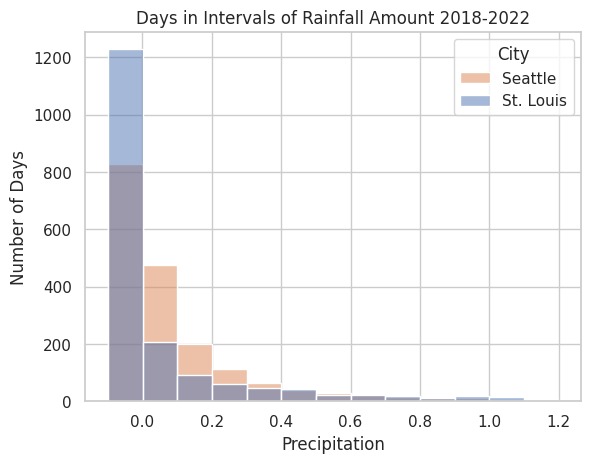

In [22]:
#histogram
my_hist = sns.histplot(data=clean_df, 
             x='precipitation', 
             hue='city',
             bins=[-0.1, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2])
my_hist.set(title='Days in Intervals of Rainfall Amount 2018-2022',
                xlabel='Precipitation',
                ylabel='Number of Days')
my_hist.legend(labels=['Seattle', 'St. Louis'],
                   title= 'City')

### Results for communication assignment

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

[Text(0.5, 1.0, 'Average Monthy Rainfall In Seattle and St. Louis'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Precipitation (inches)')]

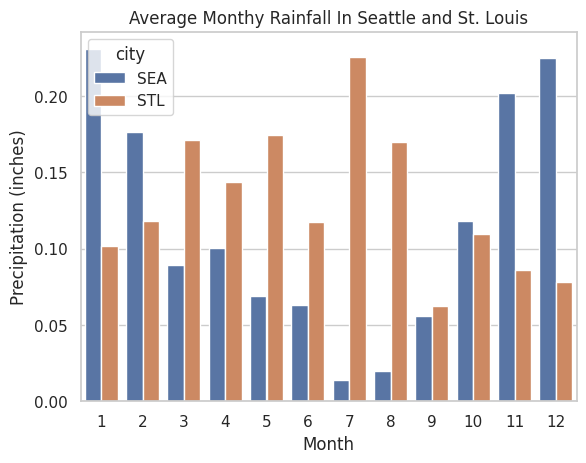

In [47]:
monthy_avgs = sns.barplot(data=mean_prcp, x='month', y='precipitation', hue='city')
monthy_avgs.set(title='Average Monthy Rainfall In Seattle and St. Louis',
                xlabel='Month',
                ylabel='Precipitation (inches)')

#monthy_avgs.legend(labels=['Seattle', 'St. Louis'],
                 #  title= 'City')

Based on the graph above, Seattle has a higher average monthly rainfall than St. Louis 5 out of 12 months, its rainiest times being around winter (Nov-Feb). St. Louis has a higher average monthy rainfall the other 7 months, its rainest times being spring and summer (March-Aug). It is also worth mentioning that Seattle has more variablility, its rainy seasons have high amounts of rain, but its dryer seasons have very low amounts. In comparison, St. Louis has less variability, its dryer seasons do not have as big a difference in comparisons to its rainy seasons. 

[Text(0.5, 1.0, 'Total Rainfall 2018-2022'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Precipitation (inches)')]

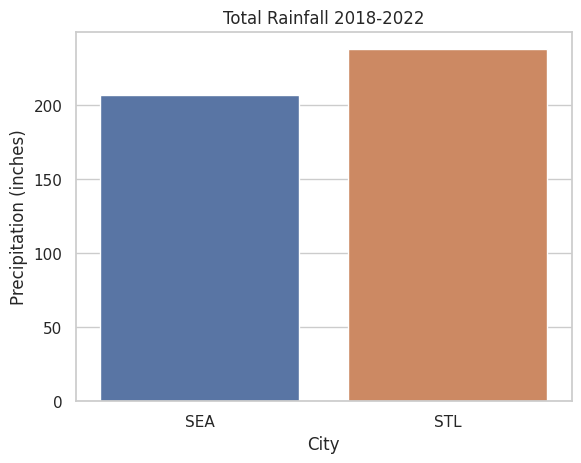

In [61]:
see_totals = sns.barplot(data=tot_sums, x='city', y='precipitation')
see_totals.set(title='Total Rainfall 2018-2022',
                xlabel='City',
                ylabel='Precipitation (inches)')

Based on the graph above, St. Louis had more inches of rain observed. 

[Text(0.5, 1.0, 'Number of Days with No Rain (2018-2022)'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Number of Days'),
 [Text(0, 0, 'Seattle'), Text(1, 0, 'St. Louis')]]

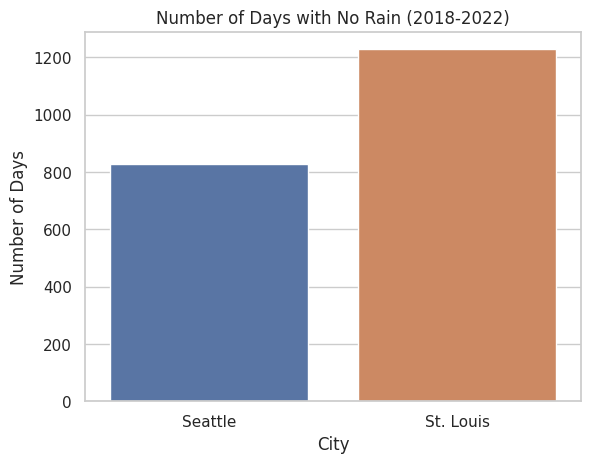

In [24]:
all_no_rain = sns.barplot(data=no_rain, x='city', y='precipitation')
all_no_rain.set(title='Number of Days with No Rain (2018-2022)',
                xlabel='City',
                ylabel='Number of Days',
                xticklabels=['Seattle', 'St. Louis'])

Based on the graph above, from 2018-2022, St. Louis had more days with no rain that Seattle. 

[Text(0.5, 1.0, 'Number of Days with No Rain (In An Average Year)'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Number of Days'),
 [Text(0, 0, 'Seattle'), Text(1, 0, 'St. Louis')]]

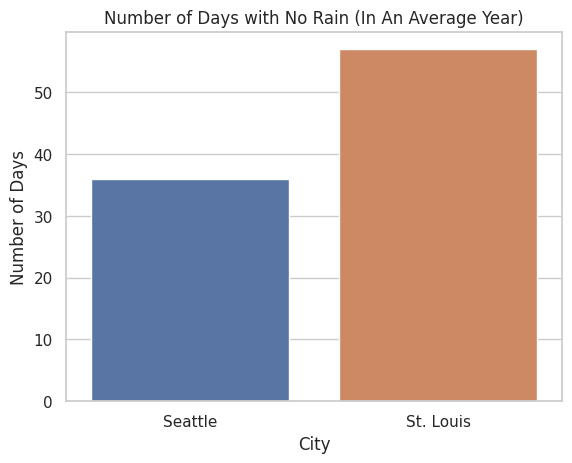

In [25]:
mean_no_rain = sns.barplot(data=no_rain_mean, x='city', y='precipitation')
mean_no_rain.set(title='Number of Days with No Rain (In An Average Year)',
                xlabel='City',
                ylabel='Number of Days',
                xticklabels=['Seattle', 'St. Louis'])

Based on the graph above, in an average year St. Louis will have a considerably higher amount of days without rain compared to Seattle.

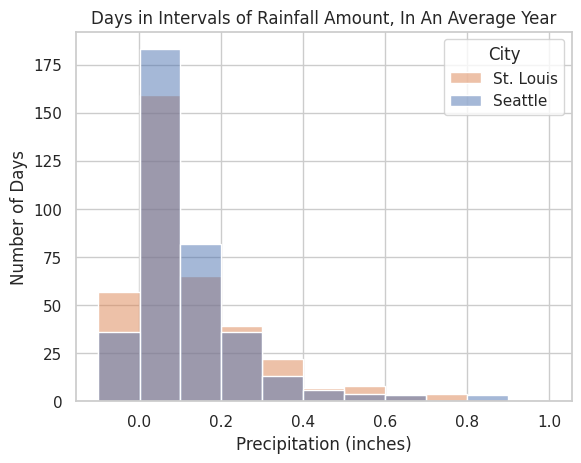

In [45]:
big_hist = sns.histplot(data=mean_prcp_daily, 
             x='precipitation', 
             hue='city', 
             bins=[-0.1, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
big_hist.set(title='Days in Intervals of Rainfall Amount, In An Average Year',
                xlabel='Precipitation (inches)',
                ylabel='Number of Days')
big_hist.legend(labels=['St. Louis', 'Seattle'],
                   title= 'City')

Based on the graph above, in an average year, Seattle will have less non rainy days and more days with very little rain (0.001-0.2). In the higher intervals, it is pretty split between the two cities on which has more days with that amount. With this visualization, we can support the conclusion that often when it does rain, it rains very little in both Seattle and St. Louis, with Seattle more often raining very little when it rains. 

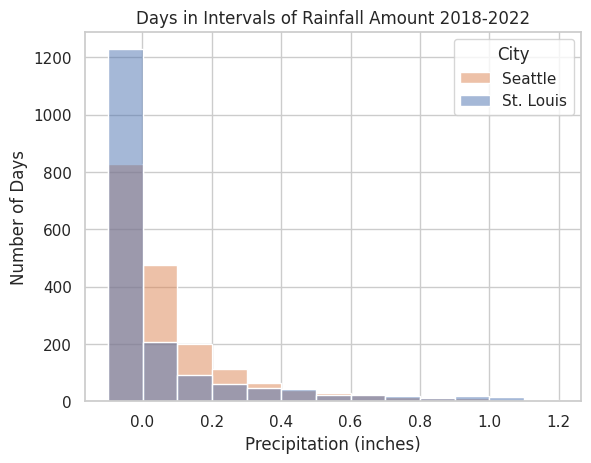

In [46]:
my_hist = sns.histplot(data=clean_df, 
             x='precipitation', 
             hue='city',
             bins=[-0.1, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2])
my_hist.set(title='Days in Intervals of Rainfall Amount 2018-2022',
                xlabel='Precipitation (inches)',
                ylabel='Number of Days')
my_hist.legend(labels=['Seattle', 'St. Louis'],
                   title= 'City')

Based on the graph above, which looks at all of the days from 2018-2022, St. Louis has a considerably higher amount of non rainy days but has more days with higher amounts of rain as well. Seattle has less non rainy days, but much more days with very low amounts of rain. 

## Conclusion

*Does it rain more in Seattle or St. Louis?*

 

  If you are most concerned with volume, St. Louis rains more by amount in general and it tends to rain in higher amounts when it does rain. 

  If you are most concerned with number of rainy days, Seattle has more rainy days versus days it does not. 

  Overall, it rains more days in Seattle, but those tend to be days with a low amount of rain. There are more non-rainy days in St. Louis, but it tends to rain more when it does rain compared to Seattle. 